# Indian book store sales project

<m>

## 1. Data wrangling and preparation

<m>

### 1.1 Read and import data

<m>

In [1]:
import pandas as pd
import numpy as np
import janitor as janitor
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns 
import sweetviz as sv
from scipy import stats
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import openpyxl
import pyarrow
import re
from fuzzywuzzy import fuzz, process
import geopandas as gpd
import warnings as warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df=pd.read_csv("Best Selling Books- Buy Products Online at Best Price in India - All Categories _ Flipkart.com.csv")

In [3]:
df.head(10)

,Item,type,selling_price,original_price,discount_perc,rating,Total_ratings,Delivery by,Delivery_time
0,"4 PCS Magic Practice Copybook For Kids, Englis...","Paperback, Generic",179,599.0,70.0,4.2,2450.0,Free delivery,Hot Deal
1,Math Concept King - All Formulas And Theorems ...,"Perfect Binding, Gagan Pratap Sir",189,200.0,5.0,4.4,26148.0,Free delivery,NaN
2,SSC Reasoning 7200 TCS MCQ Chapter Wise 4th Ed...,"Paperback, Pinnacle Publications",499,770.0,35.0,4.5,1816.0,Free delivery by,Today
3,SSC General Studies 6500 TCS MCQ Chapter Wise ...,"Paperback, Pinnacle Publications",499,650.0,23.0,4.6,1934.0,Free delivery by,Today
4,SSC Maths 6800 TCS MCQ Chapter Wise I 4th Edit...,"Paperback, Pinnacle Publications",499,770.0,35.0,4.5,2100.0,Free delivery by,Today
5,SSC General Studies 6500 TCS MCQ Chapter Wise ...,"Paperback, Hindi, Pinnacle Publications",489,640.0,23.0,4.4,1679.0,Free delivery by,Today
6,SSC Reasoning 7200 TCS MCQ Chapter Wise 4th Ed...,"Paperback, Hindi, Pinnacle Publications",489,760.0,35.0,4.5,1624.0,Free delivery by,Today
7,Indian Polity,"English, Paperback, Laxmikanth M",759,1045.0,27.0,4.6,576.0,Free delivery,NaN
8,The Reasoning Formula Book,"Paperback, Hindi, Rakesh Yadav",129,NaN,NaN,4.3,1055.0,Free delivery by,Today
9,SSC Maths 6800 TCS MCQ Chapter Wise I 4th Edit...,"Paperback, Hindi, Pinnacle Publications",489,760.0,35.0,4.4,1815.0,Free delivery by,Today


<m>

### 1.2 Understanding data

<m>

In [4]:
#report=ydp.ProfileReport(df)
#report.to_file("profiling report.html")

In [5]:
df.shape

(1195, 9)

In [6]:
df.describe()

,original_price,discount_perc,rating,Total_ratings
count,1107.000000,1107.000000,1194.000000,1194.000000
mean,767.317977,29.522132,4.405779,2194.666667
std,1396.214035,18.243486,0.157490,7061.285688
min,160.000000,2.000000,4.000000,4.000000
25%,315.000000,15.000000,4.300000,78.000000
50%,500.000000,28.000000,4.400000,531.000000
75%,760.000000,35.000000,4.500000,1679.000000
max,11999.000000,88.000000,4.800000,56305.000000


In [7]:
df.dtypes

Item               object
type               object
selling_price      object
original_price    float64
discount_perc     float64
rating            float64
Total_ratings     float64
Delivery by        object
Delivery_time      object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Item            1195 non-null   object 
 1   type            1195 non-null   object 
 2   selling_price   1195 non-null   object 
 3   original_price  1107 non-null   float64
 4   discount_perc   1107 non-null   float64
 5   rating          1194 non-null   float64
 6   Total_ratings   1194 non-null   float64
 7   Delivery by     1180 non-null   object 
 8   Delivery_time   942 non-null    object 
dtypes: float64(4), object(5)
memory usage: 84.2+ KB


In [118]:
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79, 516, 717, 841],
      dtype='int64')

In [9]:
df.duplicated().sum()

1110

In [10]:
df.isnull().sum()

Item                0
type                0
selling_price       0
original_price     88
discount_perc      88
rating              1
Total_ratings       1
Delivery by        15
Delivery_time     253
dtype: int64

<m>

### 1.3 Preparing data

<m>

In [11]:
df.columns

Index(['Item', 'type', 'selling_price', 'original_price', 'discount_perc',
       'rating', 'Total_ratings', 'Delivery by', 'Delivery_time'],
      dtype='object')

In [12]:
df=df[['Item', 'type', 'selling_price','original_price', 
       'discount_perc',
       'rating', 'Total_ratings', #'Delivery by', 
       'Delivery_time']].copy()

In [13]:
df.head(1)

,Item,type,selling_price,original_price,discount_perc,rating,Total_ratings,Delivery_time
0,"4 PCS Magic Practice Copybook For Kids, Englis...","Paperback, Generic",179,599.0,70.0,4.2,2450.0,Hot Deal


<m>

#### 1.3.1 Dealing with nulls

<m>

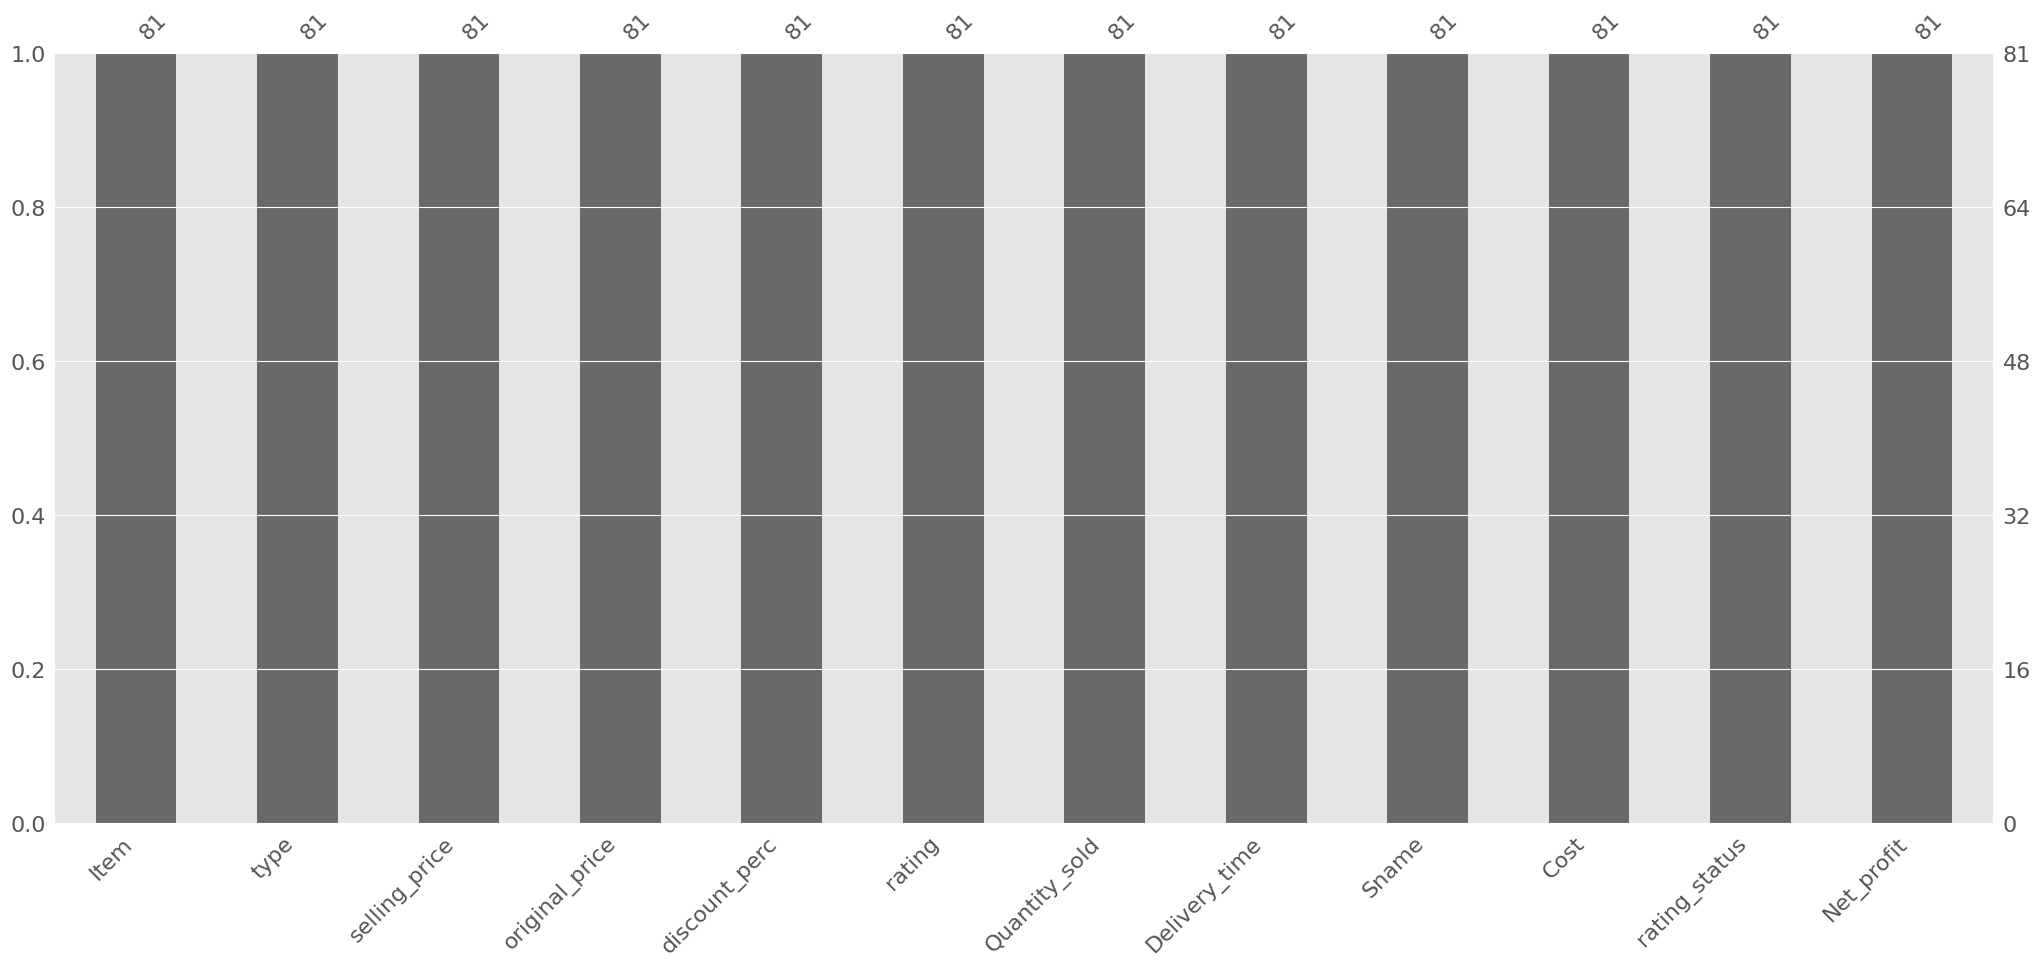

In [120]:
msno.bar(df)
plt.show()

In [119]:
df.isnull().sum()

Item              0
type              0
selling_price     0
original_price    0
discount_perc     0
rating            0
Quantity_sold     0
Delivery_time     0
Sname             0
Cost              0
rating_status     0
Net_profit        0
dtype: int64

In [14]:
df.query('discount_perc.isnull()')

,Item,type,selling_price,original_price,discount_perc,rating,Total_ratings,Delivery_time
8,The Reasoning Formula Book,"Paperback, Hindi, Rakesh Yadav",129,NaN,NaN,4.3,1055.0,Today
26,Universal’s Bare Act (C- 31 )The Constitution ...,"Paperback, LEXIS NEXIS",275,NaN,NaN,4.5,21.0,NaN
35,Last One Year+ I Current Affairs Book I July 2...,"Paperback, Pinnacle Publications",160,NaN,NaN,4.2,45.0,Today
58,Current Affairs Yearly 2023 (English Printed E...,"Paperback, Adda247 Publications",199,NaN,NaN,4.2,136.0,Today
71,"The Indian Contract Act, 1872 EDITION - 2023","Paperback, LEXIS NEXIS",110,NaN,NaN,4.8,4.0,NaN
...,...,...,...,...,...,...,...,...
1128,The Reasoning Formula Book,"Paperback, Hindi, Rakesh Yadav",129,NaN,NaN,4.3,1055.0,Today
1141,Universal’s Bare Act (C- 31 )The Constitution ...,"Paperback, LEXIS NEXIS",275,NaN,NaN,4.5,21.0,NaN
1154,Last One Year+ I Current Affairs Book I July 2...,"Paperback, Pinnacle Publications",160,NaN,NaN,4.2,45.0,Today
1177,Current Affairs Yearly 2023 (English Printed E...,"Paperback, Adda247 Publications",199,NaN,NaN,4.2,136.0,Today


In [15]:
df.query('original_price.isnull()')

,Item,type,selling_price,original_price,discount_perc,rating,Total_ratings,Delivery_time
8,The Reasoning Formula Book,"Paperback, Hindi, Rakesh Yadav",129,NaN,NaN,4.3,1055.0,Today
26,Universal’s Bare Act (C- 31 )The Constitution ...,"Paperback, LEXIS NEXIS",275,NaN,NaN,4.5,21.0,NaN
35,Last One Year+ I Current Affairs Book I July 2...,"Paperback, Pinnacle Publications",160,NaN,NaN,4.2,45.0,Today
58,Current Affairs Yearly 2023 (English Printed E...,"Paperback, Adda247 Publications",199,NaN,NaN,4.2,136.0,Today
71,"The Indian Contract Act, 1872 EDITION - 2023","Paperback, LEXIS NEXIS",110,NaN,NaN,4.8,4.0,NaN
...,...,...,...,...,...,...,...,...
1128,The Reasoning Formula Book,"Paperback, Hindi, Rakesh Yadav",129,NaN,NaN,4.3,1055.0,Today
1141,Universal’s Bare Act (C- 31 )The Constitution ...,"Paperback, LEXIS NEXIS",275,NaN,NaN,4.5,21.0,NaN
1154,Last One Year+ I Current Affairs Book I July 2...,"Paperback, Pinnacle Publications",160,NaN,NaN,4.2,45.0,Today
1177,Current Affairs Yearly 2023 (English Printed E...,"Paperback, Adda247 Publications",199,NaN,NaN,4.2,136.0,Today


In [16]:
condition=df["discount_perc"].isnull() & df["original_price"].isnull()
df.loc[condition,"discount_perc"]=0

In [17]:
condition2=df["discount_perc"]==0 & df["original_price"].isnull()

In [18]:
df.loc[condition2,"original_price"]=df["selling_price"]

In [19]:
df.dropna(subset=["rating","Total_ratings"],inplace=True)

In [20]:
df["Delivery_time"].fillna("Not Important",inplace=True)

In [21]:
df.isnull().sum()

Item              0
type              0
selling_price     0
original_price    0
discount_perc     0
rating            0
Total_ratings     0
Delivery_time     0
dtype: int64

<m>

#### 1.3.2 Dealing with duplicates

<m>

In [121]:
df.duplicated().sum()

0

In [22]:
df.loc[df.duplicated(subset=["Item"])]

,Item,type,selling_price,original_price,discount_perc,rating,Total_ratings,Delivery_time
34,SSC MTS 2023 4800 TCS MCQ Chapter Wise With De...,"Paperback, Hindi, Pinnacle Publications",360,510.0,29.0,4.3,1084.0,Today
75,Last One Year+ I Current Affairs Book I July 2...,"Paperback, Hindi, Pinnacle Publications",150,150,0.0,4.5,46.0,Today
80,"4 PCS Magic Practice Copybook For Kids, Englis...","Paperback, Generic",179,599.0,70.0,4.2,2450.0,Hot Deal
81,Math Concept King - All Formulas And Theorems ...,"Perfect Binding, Gagan Pratap Sir",189,200.0,5.0,4.4,26148.0,Not Important
82,SSC Reasoning 7200 TCS MCQ Chapter Wise 4th Ed...,"Paperback, Pinnacle Publications",499,770.0,35.0,4.5,1816.0,Today
...,...,...,...,...,...,...,...,...
1190,"The Indian Contract Act, 1872 EDITION - 2023","Paperback, LEXIS NEXIS",110,110,0.0,4.8,4.0,Not Important
1191,Junior Teacher Contractual (JTC) For Primary T...,"Paperback, Odia, i care panel",920,1150.0,20.0,4.2,155.0,Not Important
1192,Delhi Police Constable Maths 3000 TCS MCQ Chap...,"Paperback, Hindi, Pinnacle Publications",330,470.0,29.0,4.5,145.0,Today
1193,UP Police Constable General Studies Chapter Wi...,"Paperback, Hindi, Pinnacle Publications",150,160.0,6.0,4.4,26.0,Today


In [23]:
df.query('Item.str.contains("SSC MTS 2023 4800 TCS MCQ Chapter Wise With De")')

,Item,type,selling_price,original_price,discount_perc,rating,Total_ratings,Delivery_time
29,SSC MTS 2023 4800 TCS MCQ Chapter Wise With De...,"Paperback, Pinnacle Publications",360,520.0,30.0,4.4,1160.0,Today
34,SSC MTS 2023 4800 TCS MCQ Chapter Wise With De...,"Paperback, Hindi, Pinnacle Publications",360,510.0,29.0,4.3,1084.0,Today
108,SSC MTS 2023 4800 TCS MCQ Chapter Wise With De...,"Paperback, Pinnacle Publications",360,520.0,30.0,4.4,1160.0,Today
111,SSC MTS 2023 4800 TCS MCQ Chapter Wise With De...,"Paperback, Hindi, Pinnacle Publications",360,510.0,29.0,4.3,1084.0,Today
186,SSC MTS 2023 4800 TCS MCQ Chapter Wise With De...,"Paperback, Pinnacle Publications",360,520.0,30.0,4.4,1160.0,Today
191,SSC MTS 2023 4800 TCS MCQ Chapter Wise With De...,"Paperback, Hindi, Pinnacle Publications",360,510.0,29.0,4.3,1084.0,Today
269,SSC MTS 2023 4800 TCS MCQ Chapter Wise With De...,"Paperback, Pinnacle Publications",360,520.0,30.0,4.4,1160.0,Today
272,SSC MTS 2023 4800 TCS MCQ Chapter Wise With De...,"Paperback, Hindi, Pinnacle Publications",360,510.0,29.0,4.3,1084.0,Today
349,SSC MTS 2023 4800 TCS MCQ Chapter Wise With De...,"Paperback, Pinnacle Publications",360,520.0,30.0,4.4,1160.0,Today
352,SSC MTS 2023 4800 TCS MCQ Chapter Wise With De...,"Paperback, Hindi, Pinnacle Publications",360,510.0,29.0,4.3,1084.0,Today


In [24]:
df.columns

Index(['Item', 'type', 'selling_price', 'original_price', 'discount_perc',
       'rating', 'Total_ratings', 'Delivery_time'],
      dtype='object')

In [25]:
df=df.loc[~df.duplicated(subset=['Item', 'type', 'selling_price', 'original_price', 'discount_perc',
       'rating', 'Total_ratings'])]

In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(84, 8)

<m>

#### 1.3.3 Formating and adding columns

<m>

In [28]:
df.rename(columns={"Total_ratings":"Quantity_sold"},inplace=True)

In [29]:
df["selling_price"].unique()

array(['179', '189', '499', '489', '759', '129', '149', '255', '348',
       '495', '399', '382', '563', '248', '210', '310', '359', '450',
       '275', '580', '360', '4,540', '220', '339', '241', '160', '285',
       '195', '290', '168', '424', '231', '188', '279', '289', '650',
       '315', '330', '546', '599', '219', '390', '350', '2,236', '405',
       '199', '214', '336', '389', '170', '230', '365', '252', '709',
       '920', '110', '150', '234', '329', '649', '167', '306', '5,645',
       '357'], dtype=object)

In [30]:
df["selling_price"]=df["selling_price"].str.replace(',',"")

In [31]:
df["selling_price"]=df["selling_price"].astype('int')

In [32]:
df["original_price"].unique()

array([599.0, 200.0, 770.0, 650.0, 640.0, 760.0, 1045.0, '129', 219.0,
       315.0, 399.0, 775.0, 999.0, 450.0, 649.0, 330.0, 825.0, 275.0,
       949.0, 430.0, 670.0, '275', 895.0, 460.0, 520.0, 11999.0, 1999.0,
       310.0, 510.0, '160', 199.0, 500.0, 193.0, 790.0, 270.0, 260.0,
       300.0, 699.0, 345.0, 470.0, 780.0, 1474.0, 499.0, 480.0, 2795.0,
       477.0, '199', 252.0, 396.0, 198.0, 560.0, 201.0, 297.0, 1299.0,
       1150.0, '110', 160.0, 250.0, '150', 175.0, 360.0, 7699.0, 749.0],
      dtype=object)

In [33]:
df["original_price"]=df["original_price"].astype('int')

short name

In [34]:
df["Sname"]=df["Item"].str.split().str[:5].apply(lambda x: ' '.join(x))

In [35]:
df["Sname"].unique()

array(['4 PCS Magic Practice Copybook', 'Math Concept King - All',
       'SSC Reasoning 7200 TCS MCQ', 'SSC General Studies 6500 TCS',
       'SSC Maths 6800 TCS MCQ', 'Indian Polity',
       'The Reasoning Formula Book', 'The Viral Maths | Brahmastra',
       'General Knowledge - Lucent Gk(English)',
       'Ankit Bhati UPSSSC PET 2022', 'SSC English 7600 TCS MCQ',
       'SSC General Studies Theory Book', 'My First Picture Library Box',
       'SURA`S 7th Standard 5-In-1 Term',
       'History,Geography,polity And Economics By Khan',
       'Delhi Police Constable Computer Knowledge',
       'SSC REASONING CGL WARRIOR TCS', 'Sank Magic Practice Copybook (4',
       'Delhi Police Constable 2023: 37',
       'Indian Art And Culture (English',
       'Railway Reasoning 6300 TCS MCQ', 'Railway Maths 6200 TCS MCQ',
       'Universal’s Bare Act (C- 31', 'COMBO BOOK RRB Samany Vigyan',
       'SSC CGL Tier 2 Computer', 'SSC MTS 2023 4800 TCS',
       'Tintin Paperback Boxed Set 23',
      

Cost of production

In [36]:
df["Cost"]=df["selling_price"]*0.7

Rating Status

In [37]:
df["rating_status"]="undefined" 

In [38]:
for index, row in df.iterrows():
    if row["rating"] >= 4 and row["rating"] <= 4.2:
        df.loc[index, "rating_status"] = "Low rating"
    elif row["rating"] > 4.2 and row["rating"] <= 4.5:
        df.loc[index, "rating_status"] = "Medium rating"
    elif row["rating"] > 4.5 and row["rating"] <= 4.8:
        df.loc[index, "rating_status"] = "High rating"
 

Delivery Time

In [39]:
df["Delivery_time"].unique()

array(['Hot Deal', 'Not Important', ' Today', 'Lowest price since launch',
       'Daily Saver'], dtype=object)

In [40]:
dialy_saver="Daily Saver"

In [41]:
df=df[df["Delivery_time"]!='Daily Saver']

In [42]:
df["Delivery_time"].replace("Lowest price since launch","Not Important",inplace=True)

In [43]:
df["Delivery_time"].unique()

array(['Hot Deal', 'Not Important', ' Today'], dtype=object)

Net Profit

In [44]:
df["Net_profit"]=df["selling_price"]-df["Cost"]

Discount pct

In [45]:
df["discount_perc"]=df["discount_perc"]/100

In [46]:
df.head(10)

,Item,type,selling_price,original_price,discount_perc,rating,Quantity_sold,Delivery_time,Sname,Cost,rating_status,Net_profit
0,"4 PCS Magic Practice Copybook For Kids, Englis...","Paperback, Generic",179,599,0.70,4.2,2450.0,Hot Deal,4 PCS Magic Practice Copybook,125.3,Low rating,53.7
1,Math Concept King - All Formulas And Theorems ...,"Perfect Binding, Gagan Pratap Sir",189,200,0.05,4.4,26148.0,Not Important,Math Concept King - All,132.3,Medium rating,56.7
2,SSC Reasoning 7200 TCS MCQ Chapter Wise 4th Ed...,"Paperback, Pinnacle Publications",499,770,0.35,4.5,1816.0,Today,SSC Reasoning 7200 TCS MCQ,349.3,Medium rating,149.7
3,SSC General Studies 6500 TCS MCQ Chapter Wise ...,"Paperback, Pinnacle Publications",499,650,0.23,4.6,1934.0,Today,SSC General Studies 6500 TCS,349.3,High rating,149.7
4,SSC Maths 6800 TCS MCQ Chapter Wise I 4th Edit...,"Paperback, Pinnacle Publications",499,770,0.35,4.5,2100.0,Today,SSC Maths 6800 TCS MCQ,349.3,Medium rating,149.7
5,SSC General Studies 6500 TCS MCQ Chapter Wise ...,"Paperback, Hindi, Pinnacle Publications",489,640,0.23,4.4,1679.0,Today,SSC General Studies 6500 TCS,342.3,Medium rating,146.7
6,SSC Reasoning 7200 TCS MCQ Chapter Wise 4th Ed...,"Paperback, Hindi, Pinnacle Publications",489,760,0.35,4.5,1624.0,Today,SSC Reasoning 7200 TCS MCQ,342.3,Medium rating,146.7
7,Indian Polity,"English, Paperback, Laxmikanth M",759,1045,0.27,4.6,576.0,Not Important,Indian Polity,531.3,High rating,227.7
8,The Reasoning Formula Book,"Paperback, Hindi, Rakesh Yadav",129,129,0.00,4.3,1055.0,Today,The Reasoning Formula Book,90.3,Medium rating,38.7
9,SSC Maths 6800 TCS MCQ Chapter Wise I 4th Edit...,"Paperback, Hindi, Pinnacle Publications",489,760,0.35,4.4,1815.0,Today,SSC Maths 6800 TCS MCQ,342.3,Medium rating,146.7


In [47]:
df["Delivery_time"].unique()

array(['Hot Deal', 'Not Important', ' Today'], dtype=object)

In [48]:
df["selling_price"].sum()

39345

<m>

### 1.3.4 Dealing with outliers

##### Z-score & IQR

<m>

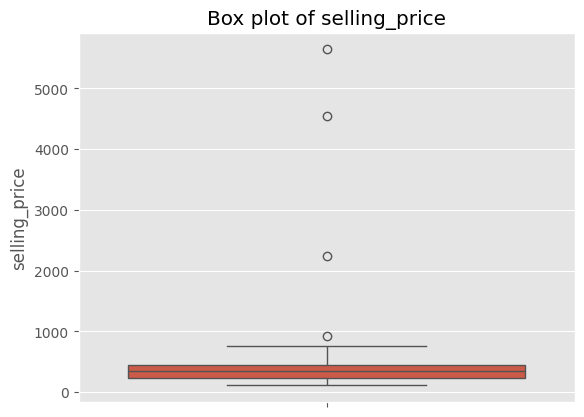

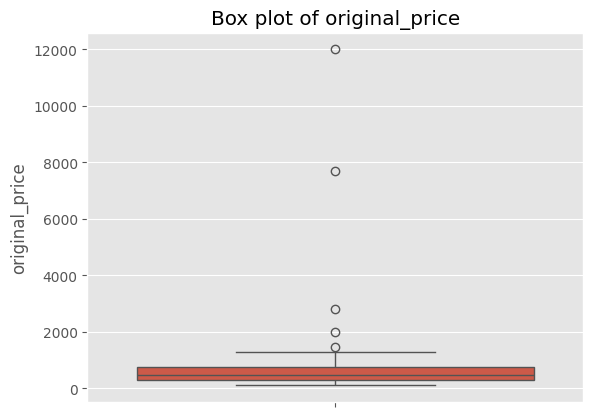

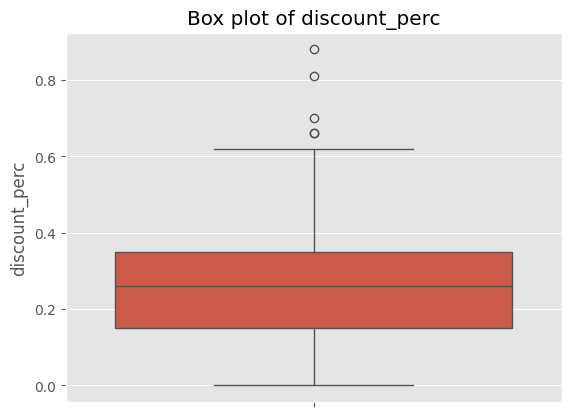

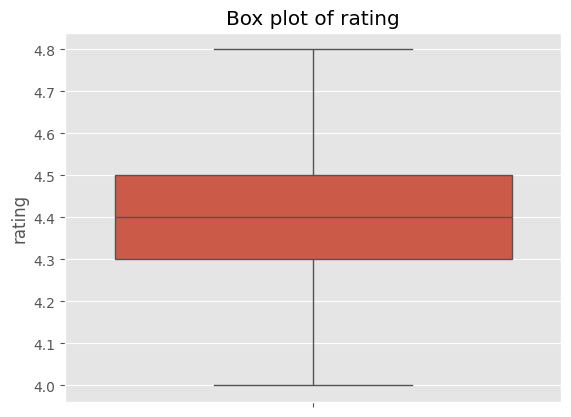

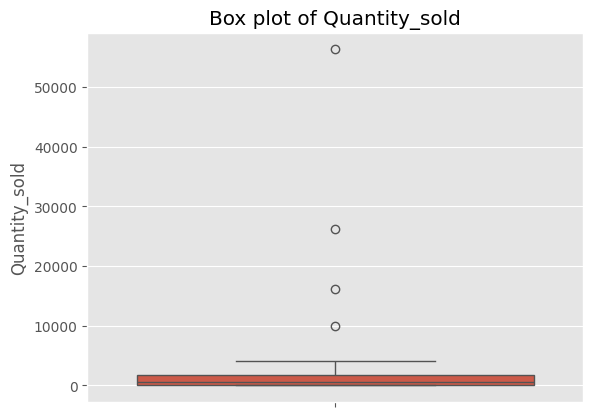

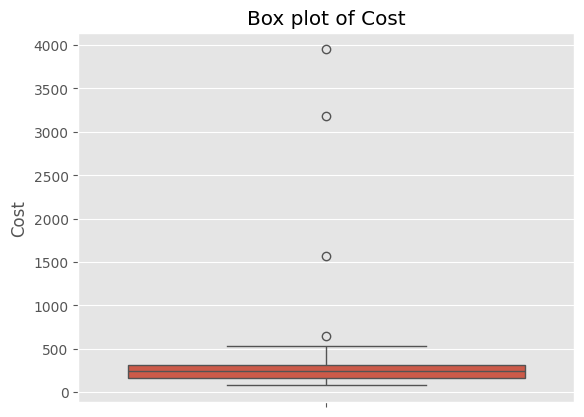

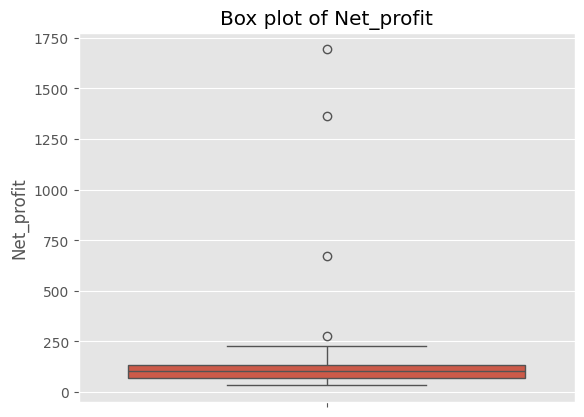

In [122]:
for column in ['selling_price','original_price','discount_perc','rating','Quantity_sold','Cost','Net_profit']:
    sns.boxplot(df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

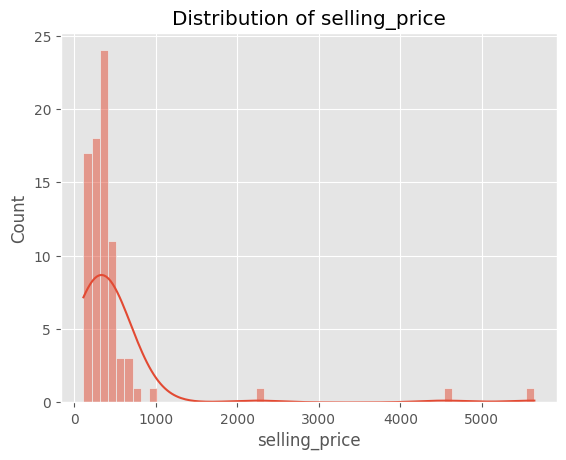

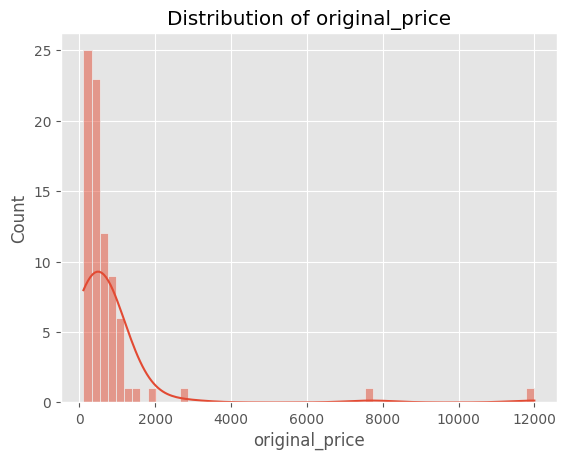

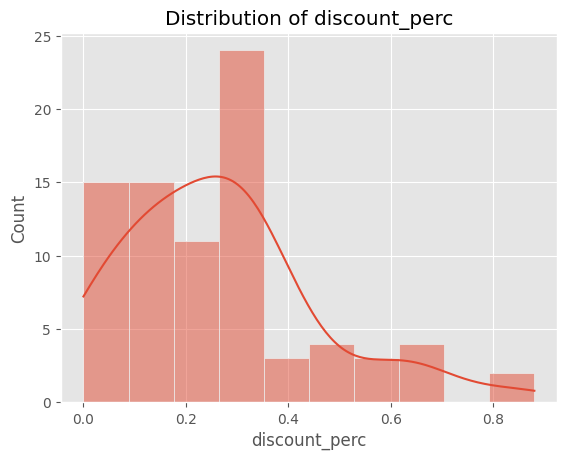

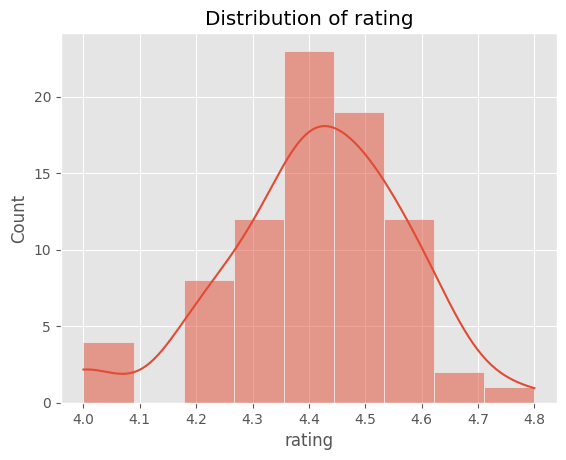

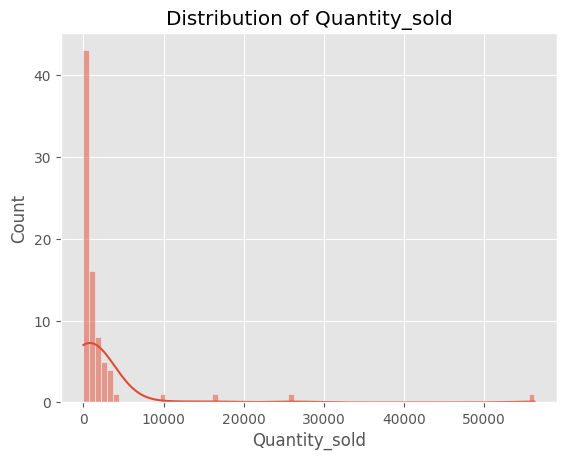

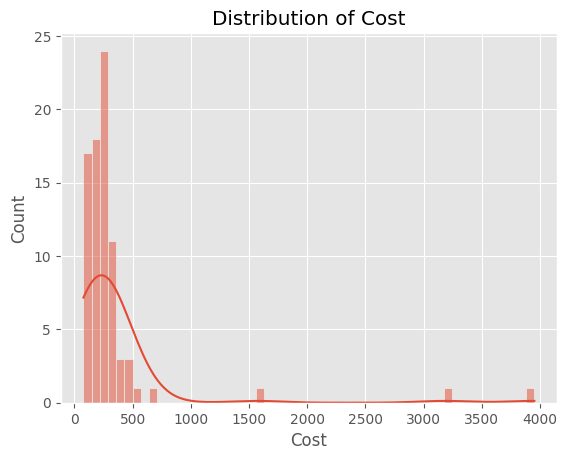

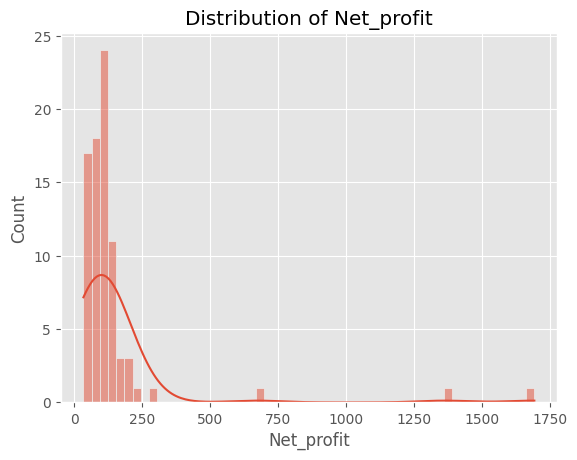

In [56]:
for column in['selling_price','original_price','discount_perc','rating','Quantity_sold','Cost','Net_profit']:
    sns.histplot(df[column],kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [57]:
df[['selling_price','original_price','discount_perc','rating','Quantity_sold','Cost','Net_profit']].skew()

selling_price     5.481508
original_price    6.043751
discount_perc     0.975402
rating           -0.514949
Quantity_sold     6.427004
Cost              5.481508
Net_profit        5.481508
dtype: float64

<m>

###### IQR

<m>

In [58]:
def IQR_outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    upper_bond=q3+1.5*iqr
    lower_bond=q1-1.5*iqr
    return df[(df[column]>upper_bond) | (df[column]<lower_bond)]


In [59]:
def IQR_outliers_values(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    upper_bond=q3+1.5*iqr
    lower_bond=q1-1.5*iqr
    print(f'Upper_bond: {upper_bond}\n Lower_bond: {lower_bond}')

In [60]:
IQR_outliers_values(df,'Quantity_sold')

Upper_bond: 4071.5
 Lower_bond: -2308.5


In [61]:
IQR_outliers(df,'Quantity_sold')

,Item,type,selling_price,original_price,discount_perc,rating,Quantity_sold,Delivery_time,Sname,Cost,rating_status,Net_profit
1,Math Concept King - All Formulas And Theorems ...,"Perfect Binding, Gagan Pratap Sir",189,200,0.05,4.4,26148.0,Not Important,Math Concept King - All,132.3,Medium rating,56.7
11,General Knowledge - Lucent Gk(English) with 2...,"English, Paperback, unknown",255,315,0.19,4.5,56305.0,Not Important,General Knowledge - Lucent Gk(English),178.5,Medium rating,76.5
15,My First Picture Library Box Of 10 Board Books...,"Board book, Sawan",399,999,0.60,4.5,16149.0,Today,My First Picture Library Box,279.3,Medium rating,119.7
36,Complete Arithmetic (BILINGUAL) 2500+ MCQs Upd...,"Paperback, Hindi, Ankit Bhati Sir, Rahul Tewti...",285,399,0.28,4.6,9925.0,Hot Deal,Complete Arithmetic (BILINGUAL) 2500+ MCQs,199.5,High rating,85.5


In [62]:
df['selling_price'].max()

5645

In [63]:
df['selling_price'].min()

110

In [64]:
df.sort_values(by='selling_price',ascending=False).head(10)

,Item,type,selling_price,original_price,discount_perc,rating,Quantity_sold,Delivery_time,Sname,Cost,rating_status,Net_profit
841,IAS Samanya Adhyayan Notes For UPSC Prelims & ...,"Paperback, Hindi, ToppersNotes",5645,7699,0.26,4.2,274.0,Not Important,IAS Samanya Adhyayan Notes For,3951.5,Low rating,1693.5
30,Tintin Paperback Boxed Set 23 Titles (BBD Spec...,"Paperback, Multi",4540,11999,0.62,4.3,28.0,Not Important,Tintin Paperback Boxed Set 23,3178.0,Medium rating,1362.0
55,"B D CHAURASIA'S HUMAN ANATOMY 9th Ed, 4 Volume...","Paperback, BD Chaurasia",2236,2795,0.20,4.6,3438.0,Today,B D CHAURASIA'S HUMAN ANATOMY,1565.2,High rating,670.8
70,Junior Teacher Contractual (JTC) For Primary T...,"Paperback, Odia, i care panel",920,1150,0.20,4.2,155.0,Not Important,Junior Teacher Contractual (JTC) For,644.0,Low rating,276.0
7,Indian Polity,"English, Paperback, Laxmikanth M",759,1045,0.27,4.6,576.0,Not Important,Indian Polity,531.3,High rating,227.7
69,Set Of 2: Fundamentals Of Geography & Principl...,"Paperback, StudyIQ Publications",709,1299,0.45,4.6,853.0,Today,Set Of 2: Fundamentals Of,496.3,High rating,212.7
46,COMPETITIVE HANDBOOK OF NURSING Vol 2,"Paperback, p r yadav",650,699,0.07,4.4,2997.0,Not Important,COMPETITIVE HANDBOOK OF NURSING Vol,455.0,Medium rating,195.0
79,50+ Bank PO & Clerk 3.0 | 2018-2022 Previous Y...,"Paperback, Adda247 Publications",649,999,0.35,4.5,872.0,Today,50+ Bank PO & Clerk,454.3,Medium rating,194.7
50,A Good Girl’s Guide To Murder+ Good Girl Bad B...,"Paperback, Holly Jackson",599,1474,0.59,4.2,326.0,Not Important,A Good Girl’s Guide To,419.3,Low rating,179.7
17,"History,Geography,polity And Economics By Khan...","Paperback, Hindi, Kiran publication",563,649,0.13,4.4,2406.0,Not Important,"History,Geography,polity And Economics By Khan",394.1,Medium rating,168.9


<m>

### 1.4 Understanding features

<m>

### (Univariant analysis)

<m>

##### Distribtion of features

<m>

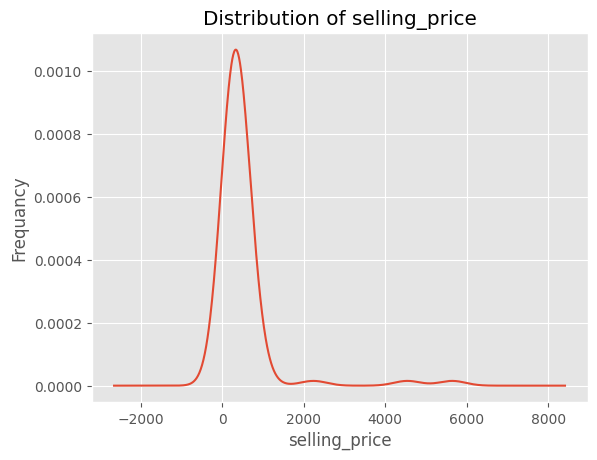

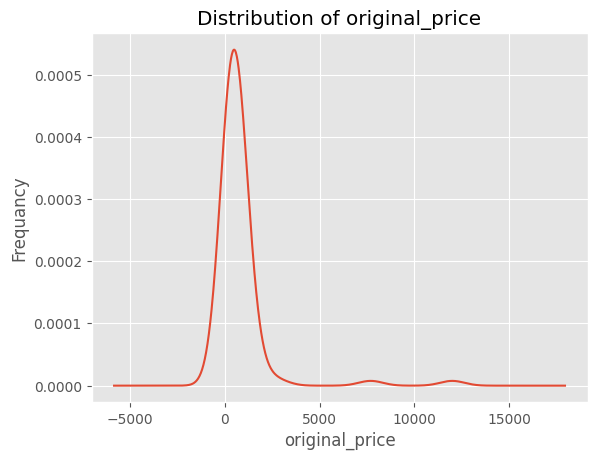

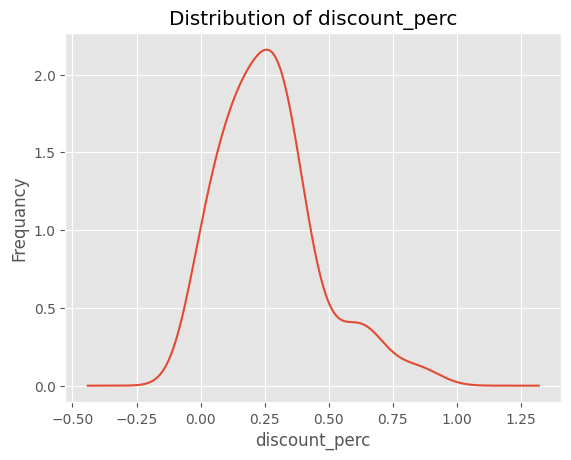

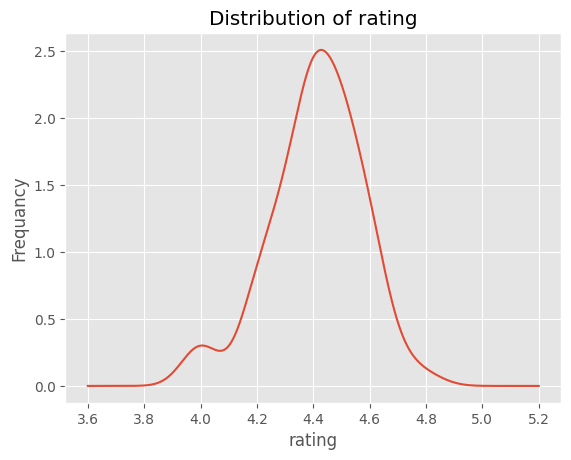

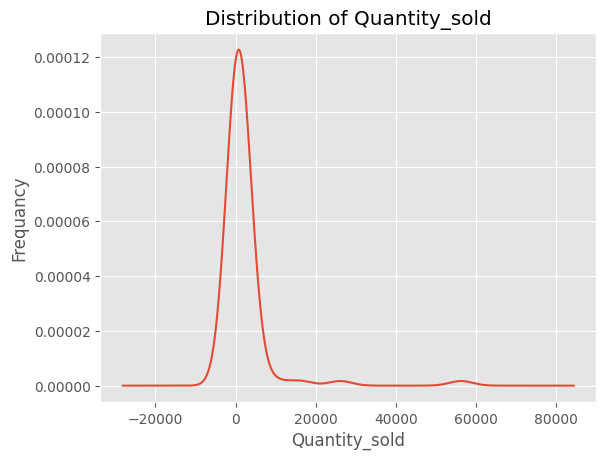

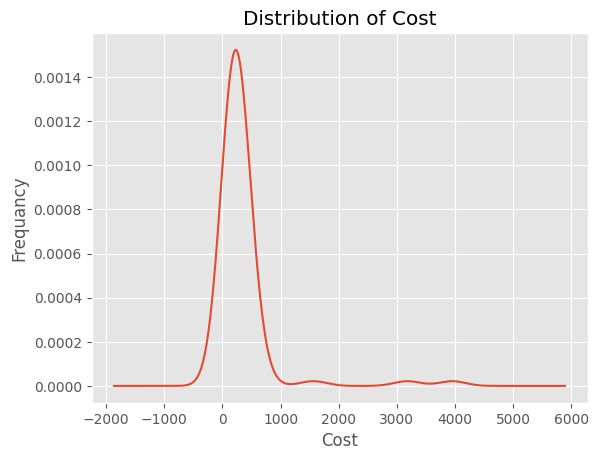

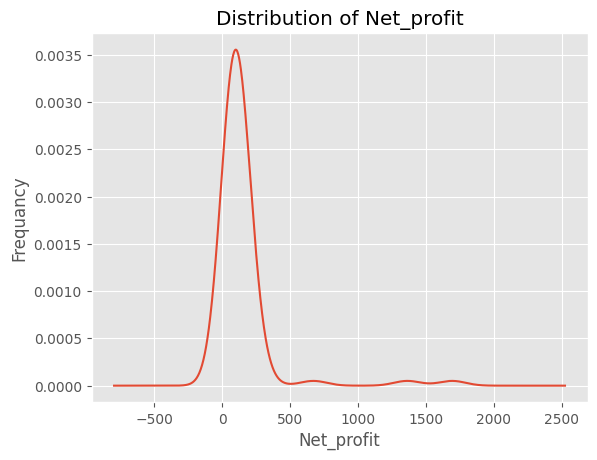

In [125]:
for column in ['selling_price','original_price','discount_perc','rating','Quantity_sold','Cost','Net_profit']:
    
    ax=df[column].plot(kind="kde",title=f"Distribution of {column}")
    ax.set_xlabel(f"{column}")
    ax.set_ylabel("Frequancy")
    plt.show()

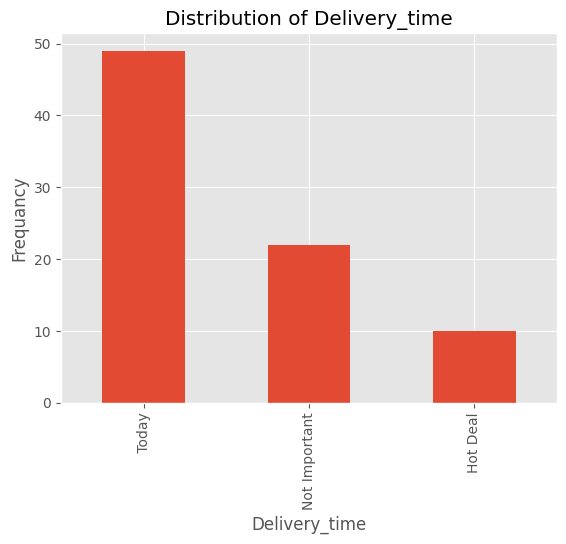

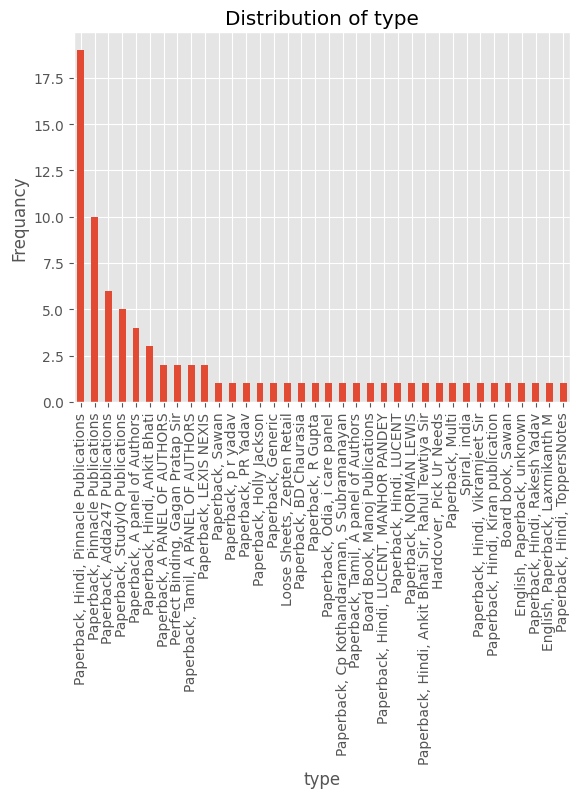

In [126]:
for column in ['Delivery_time','type']:
    ax=df[column].value_counts().plot(kind="bar",title=f"Distribution of {column}")
    ax.set_xlabel(f"{column}")
    ax.set_ylabel("Frequancy")
    plt.show()

<m>

## 2. Analyzing data

### 2.1 Heatmap

<m>

In [72]:
numeric_df=df.select_dtypes(include=['number'])
cor1=numeric_df.corr()

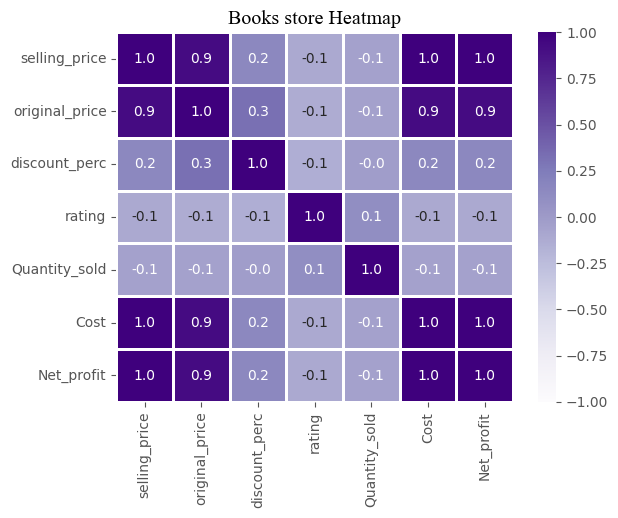

In [73]:
sns.heatmap(cor1,annot=True,fmt=".1f",vmin=-1,vmax=1,center=0,cmap="Purples",linewidth=1)
plt.title("Books store heatmap",fontfamily="times new roman")
plt.show()

In [74]:
df.head(1)

,Item,type,selling_price,original_price,discount_perc,rating,Quantity_sold,Delivery_time,Sname,Cost,rating_status,Net_profit
0,"4 PCS Magic Practice Copybook For Kids, Englis...","Paperback, Generic",179,599,0.7,4.2,2450.0,Hot Deal,4 PCS Magic Practice Copybook,125.3,Low rating,53.7


<m>

### 2.2 Most profitable books

<m>

In [75]:
mpb=(df.groupby('Sname')[["Quantity_sold","Net_profit"]].apply(lambda x: (x["Quantity_sold"]*x["Net_profit"]).sum()).sort_values(ascending=False).head(10))
mpb

Sname
General Knowledge - Lucent Gk(English)        4307332.5
B D CHAURASIA'S HUMAN ANATOMY                 2306210.4
My First Picture Library Box                  1933035.3
Math Concept King - All                       1482591.6
Complete Arithmetic (BILINGUAL) 2500+ MCQs     848587.5
COMPETITIVE HANDBOOK OF NURSING Vol            584415.0
SSC Maths 6800 TCS MCQ                         580630.5
SSC General Studies 6500 TCS                   535829.1
SSC Reasoning 7200 TCS MCQ                     510096.0
IAS Samanya Adhyayan Notes For                 464019.0
dtype: float64

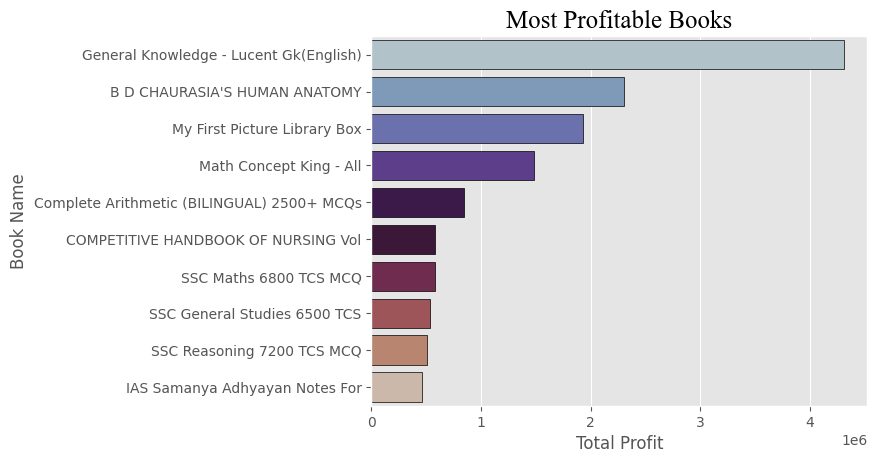

In [76]:
sns.barplot(x=mpb.values,y=mpb.index,edgecolor="k",palette="twilight")
plt.title("Most profitable books",fontfamily="times new roman",size=18)
plt.xlabel("Total profit")
plt.ylabel("Book name")
plt.show()

<m>

### 2.3 Books with most costs

<m>

In [77]:
total_cost_book = (df.groupby('Sname')[['Quantity_sold', 'Cost']]
                   .apply(lambda x: (x['Quantity_sold'] * x['Cost']).sum())
                   .sort_values(ascending=False)
                   .head(10))
total_cost_book

Sname
General Knowledge - Lucent Gk(English)        10050442.5
B D CHAURASIA'S HUMAN ANATOMY                  5381157.6
My First Picture Library Box                   4510415.7
Math Concept King - All                        3459380.4
Complete Arithmetic (BILINGUAL) 2500+ MCQs     1980037.5
COMPETITIVE HANDBOOK OF NURSING Vol            1363635.0
SSC Maths 6800 TCS MCQ                         1354804.5
SSC General Studies 6500 TCS                   1250267.9
SSC Reasoning 7200 TCS MCQ                     1190224.0
IAS Samanya Adhyayan Notes For                 1082711.0
dtype: float64

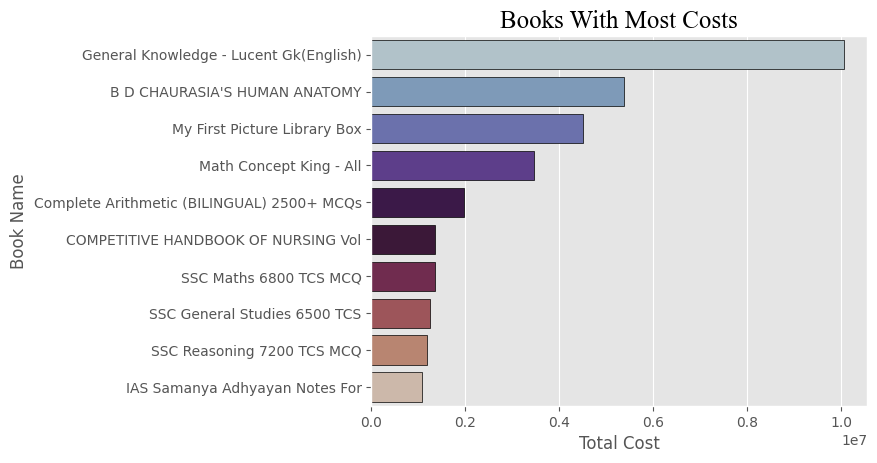

In [78]:
sns.barplot(x=total_cost_book.values,y=total_cost_book.index,edgecolor="k",palette="twilight")
plt.title("Books with most costs",fontfamily="times new roman",size=18)
plt.xlabel("Total cost")
plt.ylabel("Book name")
plt.show()

<m>

### 2.4 Books with most revenues

<m>

In [79]:
bmr=df.groupby("Sname")[["Quantity_sold","selling_price"]].apply(lambda x:(x["Quantity_sold"]*x["selling_price"]).sum()).sort_values(ascending=False).head(10)
bmr                                                                                                                                                          

Sname
General Knowledge - Lucent Gk(English)        14357775.0
B D CHAURASIA'S HUMAN ANATOMY                  7687368.0
My First Picture Library Box                   6443451.0
Math Concept King - All                        4941972.0
Complete Arithmetic (BILINGUAL) 2500+ MCQs     2828625.0
COMPETITIVE HANDBOOK OF NURSING Vol            1948050.0
SSC Maths 6800 TCS MCQ                         1935435.0
SSC General Studies 6500 TCS                   1786097.0
SSC Reasoning 7200 TCS MCQ                     1700320.0
IAS Samanya Adhyayan Notes For                 1546730.0
dtype: float64

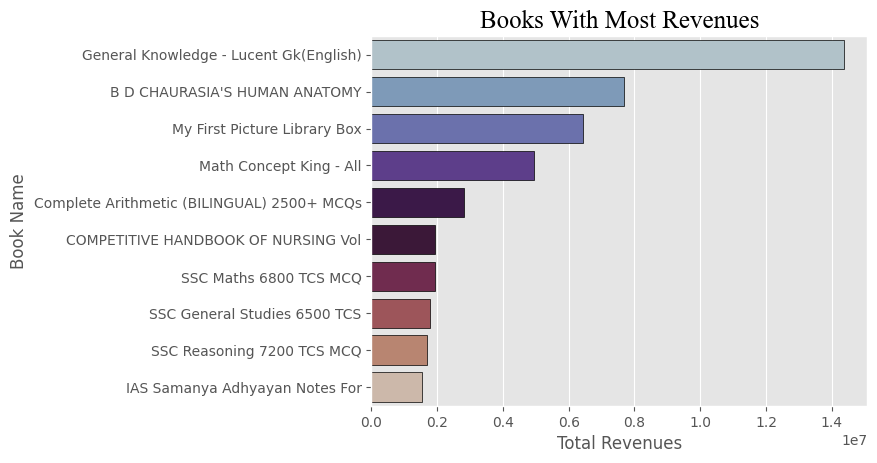

In [80]:
sns.barplot(x=bmr.values,y=bmr.index,edgecolor="k",palette="twilight")
plt.title("Books with most revenues",fontfamily="times new roman",size=18)
plt.xlabel("Total revenues")
plt.ylabel("Book name")
plt.show()

<n>

### 2.5 Least profitable books

<m>

In [81]:
lpb=(df.groupby('Sname')[["Quantity_sold","Net_profit"]].apply(lambda x: (x["Quantity_sold"]*x["Net_profit"]).sum()).sort_values(ascending=True).head(10))
lpb


Sname
The Indian Contract Act, 1872             132.0
SURA`S 6th Standard Social Science        378.0
SURA`S 8th Standard Guide Social          770.4
UP Police Constable General Studies      1170.0
Universal’s Bare Act (C- 31              1732.5
UP Police Constable Maths Chapter        2091.0
UP Police Constable Reasoning Chapter    2652.0
SSC Maths 100 TCS Shifts                 2967.0
SURA`S 11th Standard Chemistry Volume    3523.5
SURA`S 11th Standard Economics Exam      3580.2
dtype: float64

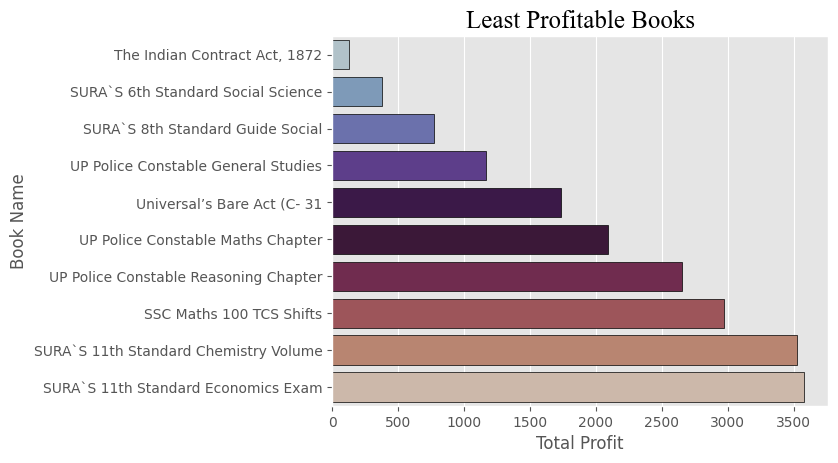

In [82]:
sns.barplot(x=lpb.values,y=lpb.index,edgecolor="k",palette="twilight")
plt.title("Least profitable books",fontfamily="times new roman",size=18)
plt.xlabel("Total profit")
plt.ylabel("Book name")
plt.show()

<m>

### 2.6 Books with the highest ratings

<m>

In [83]:
book_hrat=df.groupby("Sname").rating.max().sort_values(ascending=False).head(5)
book_hrat

Sname
The Indian Contract Act, 1872                4.8
SURA`S 11th Standard Economics Exam          4.7
Delhi Police Constable Computer Knowledge    4.7
SSC General Studies 6500 TCS                 4.6
The Viral Maths | Brahmastra                 4.6
Name: rating, dtype: float64

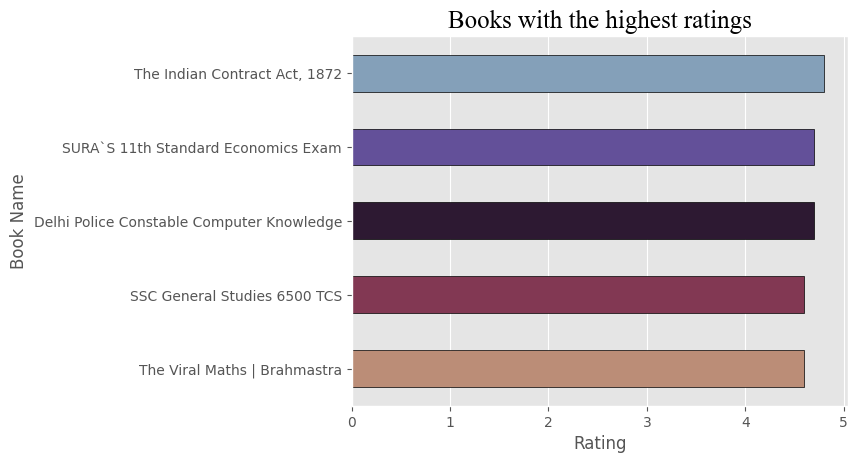

In [84]:
sns.barplot(x=book_hrat.values,y=book_hrat.index,edgecolor="k",palette="twilight",width=0.5)
plt.title("Books with the highest ratings",fontfamily="times new roman",size=18)
plt.xlabel("Rating")
plt.ylabel("Book name")
plt.show()

<m>

### 2.7 Books with the lowest ratings

<m>

In [85]:
book_lrat=df.groupby("Sname").rating.max().sort_values(ascending=True).head(5)
book_lrat

Sname
Heat & Mass Transfer Data          4.0
SSC Maths 100 TCS Shifts           4.0
Sank Magic Practice Copybook (4    4.0
4 PCS Magic Practice Copybook      4.2
A Good Girl’s Guide To             4.2
Name: rating, dtype: float64

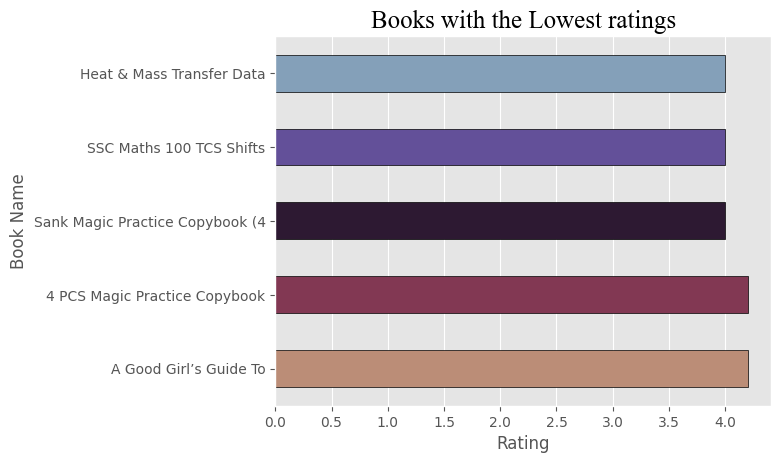

In [86]:
sns.barplot(x=book_lrat.values,y=book_lrat.index,edgecolor="k",palette="twilight",width=0.5)
plt.title("Books with the Lowest ratings",fontfamily="times new roman",size=18)
plt.xlabel("Rating")
plt.ylabel("Book name")
plt.show()

<m>

<m>

### 2.8 Most expensive books

<m>

In [87]:
top10p=df.groupby("Sname").selling_price.max().sort_values(ascending=False).head(10)
top10p

Sname
IAS Samanya Adhyayan Notes For                    5645
Tintin Paperback Boxed Set 23                     4540
B D CHAURASIA'S HUMAN ANATOMY                     2236
Junior Teacher Contractual (JTC) For               920
Indian Polity                                      759
Set Of 2: Fundamentals Of                          709
COMPETITIVE HANDBOOK OF NURSING Vol                650
50+ Bank PO & Clerk                                649
A Good Girl’s Guide To                             599
History,Geography,polity And Economics By Khan     563
Name: selling_price, dtype: int32

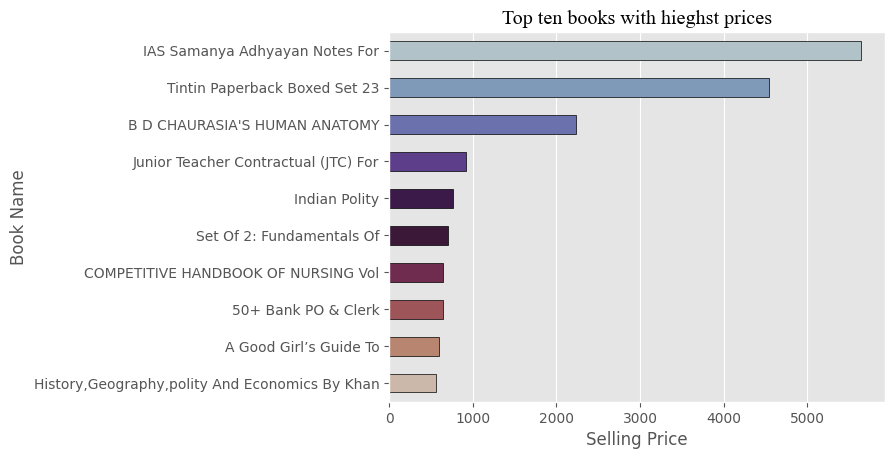

In [88]:
sns.barplot(y=top10p.index,x=top10p.values,edgecolor="k",width=0.5,palette="twilight")
plt.title("Top ten books with hieghst prices",fontfamily="times new roman")
plt.ylabel("Book name")
plt.xlabel("Selling price")
plt.show()

<m>

### 2.9 Cheapiest books 

<m>

In [89]:
cheap=df.groupby("Sname").selling_price.min().sort_values(ascending=True).head(10)
cheap

Sname
The Indian Contract Act, 1872            110
The Reasoning Formula Book               129
The Viral Maths | Brahmastra             149
UP Police Constable General Studies      150
Last One Year+ I Current                 150
Samanya Gyan By Ankit Bhati              167
Word Power Made Easy                     168
UP Police Constable Reasoning Chapter    170
UP Police Constable Maths Chapter        170
Sank Magic Practice Copybook (4          179
Name: selling_price, dtype: int32

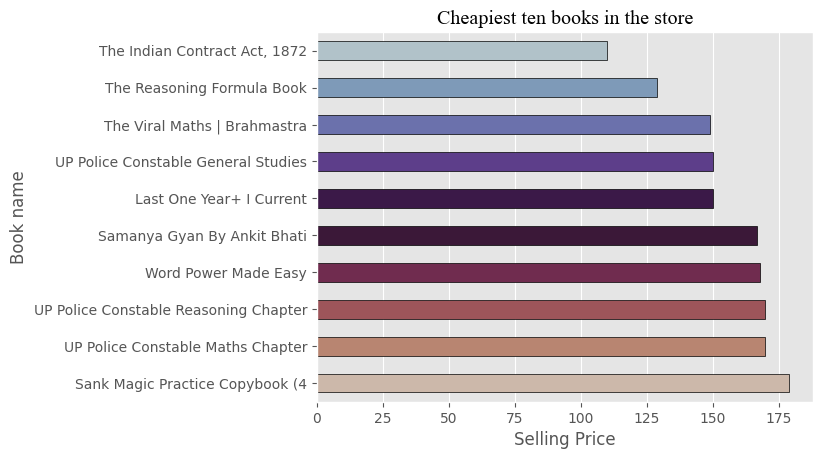

In [90]:
sns.barplot(x=cheap.values,y=cheap.index,edgecolor="k",width=0.5,palette="twilight")
plt.title("Cheapiest ten books in the store",fontfamily="times new roman")
plt.ylabel("Book name")
plt.xlabel("Selling price")
plt.show()

<m>

### 2.10 Most sold books

<m>

In [91]:
qbm=df.groupby("Sname").Quantity_sold.sum().sort_values(ascending=False).head(10)
qbm

Sname
General Knowledge - Lucent Gk(English)        56305.0
Math Concept King - All                       26148.0
My First Picture Library Box                  16149.0
Complete Arithmetic (BILINGUAL) 2500+ MCQs     9925.0
UP Police Consteble Samany Adhyan              4016.0
SSC Maths 6800 TCS MCQ                         3915.0
SSC General Studies 6500 TCS                   3613.0
SSC Reasoning 7200 TCS MCQ                     3440.0
B D CHAURASIA'S HUMAN ANATOMY                  3438.0
Ankit Bhati UPSSSC PET 2022                    3365.0
Name: Quantity_sold, dtype: float64

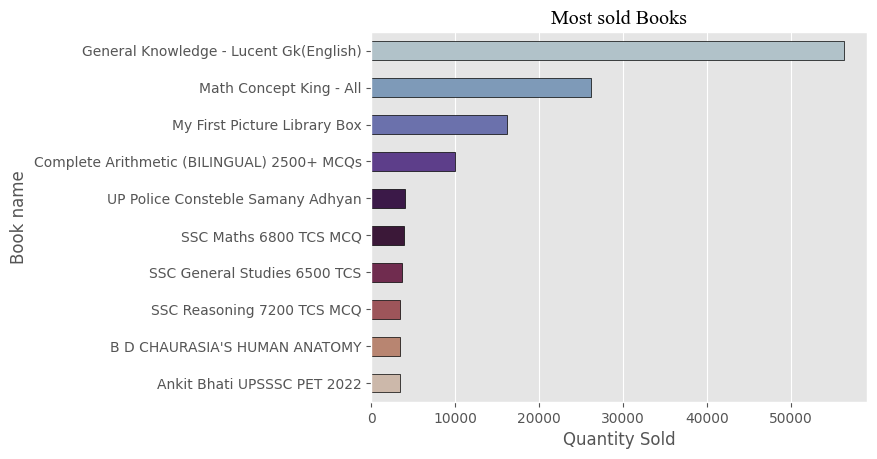

In [92]:
sns.barplot(x=qbm.values,y=qbm.index,edgecolor="k",width=0.5,palette="twilight")
plt.title("Most sold books",fontfamily="times new roman")
plt.ylabel("Book name")
plt.xlabel("Quantity sold")
plt.show()

<m>

### 2.11 Cost assotiated with each delivery time

<m>

In [93]:
delv_costs=df.groupby("Delivery_time").Cost.sum().sort_values(ascending=False)
delv_costs

Delivery_time
 Today           13503.7
Not Important    12084.8
Hot Deal          1953.0
Name: Cost, dtype: float64

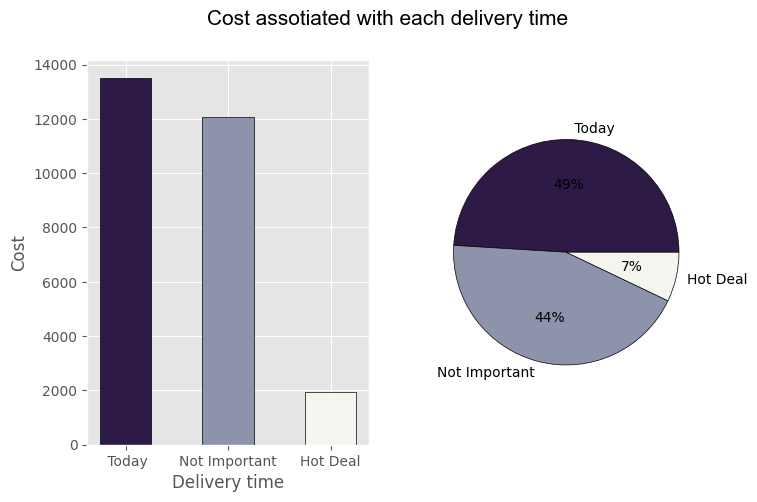

In [130]:
colors = ['#2E1A47','#8d93ab','#F5F5F0'] #['#95264E', '#AB83A1', '#D4A5A5'],['#AB83A1','#95264E','#D4A5A5'],['#D4A5A5','#AB83A1''#95264E'],['#D4A5A5','#95264E','#AB83A1']
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(8,5))
axis[0].bar(delv_costs.index,delv_costs.values,edgecolor="k",width=0.5,color=colors)
axis[0].set_xlabel("Delivery time")
axis[0].set_ylabel("Cost")
axis[1].pie(delv_costs.values,labels=delv_costs.index,autopct='%1.0f%%',wedgeprops={'edgecolor':"black"},colors=colors)
fig.suptitle('Cost assotiated with each delivery time',fontfamily='arial',size=15)
plt.show()

<m>

### 2.12 Cost assotiated with each rating status

<m>

In [95]:
rat_costs=df.groupby("rating_status").Cost.sum().sort_values(ascending=False)
rat_costs

rating_status
Medium rating    15859.9
Low rating        6542.9
High rating       5138.7
Name: Cost, dtype: float64

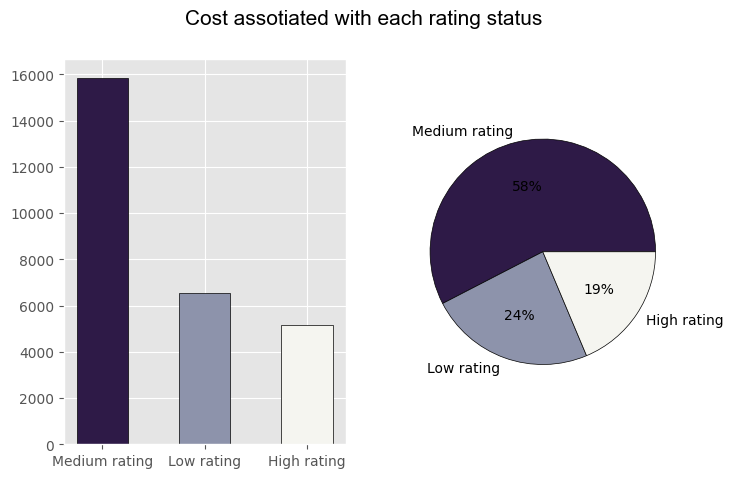

In [131]:
colors = ['#2E1A47','#8d93ab','#F5F5F0']
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(8,5))
axis[0].bar(rat_costs.index,rat_costs.values,color=colors,edgecolor="k",width=0.5)
axis[1].pie(rat_costs.values,labels=rat_costs.index,colors=colors,autopct='%1.0f%%',wedgeprops={"edgecolor":"black"})
fig.suptitle('Cost assotiated with each rating status',fontfamily='arial',size=15)
plt.show()

<m>

### 2.13 Type analysis

<m>

In [97]:
df.head(1)

,Item,type,selling_price,original_price,discount_perc,rating,Quantity_sold,Delivery_time,Sname,Cost,rating_status,Net_profit
0,"4 PCS Magic Practice Copybook For Kids, Englis...","Paperback, Generic",179,599,0.7,4.2,2450.0,Hot Deal,4 PCS Magic Practice Copybook,125.3,Low rating,53.7


In [98]:
type_rev=df.groupby("type").selling_price.sum().sort_values(ascending=False).head(5)
type_prof=df.groupby("type").Net_profit.sum().sort_values(ascending=False).head(5)
type_cost=df.groupby("type").Cost.sum().sort_values(ascending=False).head(5)

In [99]:
summary_df=pd.concat([type_rev,type_cost,type_prof],axis=1).reset_index().rename(columns={'Index':'Type'})
melted_df=summary_df.melt(id_vars='type',value_vars=['selling_price','Cost','Net_profit'],var_name='Metric',value_name="value")

In [100]:
summary_df

,type,selling_price,Cost,Net_profit
0,"Paperback, Hindi, Pinnacle Publications",6514,4559.8,1954.2
1,"Paperback, Hindi, ToppersNotes",5645,3951.5,1693.5
2,"Paperback, Multi",4540,3178.0,1362.0
3,"Paperback, Pinnacle Publications",3916,2741.2,1174.8
4,"Paperback, BD Chaurasia",2236,1565.2,670.8


In [101]:
melted_df

,type,Metric,value
0,"Paperback, Hindi, Pinnacle Publications",selling_price,6514.0
1,"Paperback, Hindi, ToppersNotes",selling_price,5645.0
2,"Paperback, Multi",selling_price,4540.0
3,"Paperback, Pinnacle Publications",selling_price,3916.0
4,"Paperback, BD Chaurasia",selling_price,2236.0
5,"Paperback, Hindi, Pinnacle Publications",Cost,4559.8
6,"Paperback, Hindi, ToppersNotes",Cost,3951.5
7,"Paperback, Multi",Cost,3178.0
8,"Paperback, Pinnacle Publications",Cost,2741.2
9,"Paperback, BD Chaurasia",Cost,1565.2


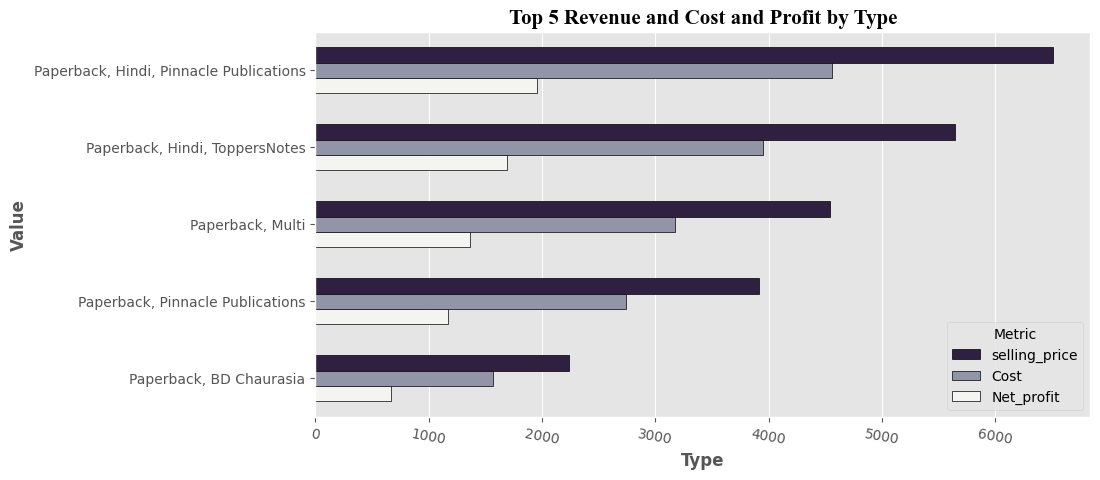

In [102]:
plt.figure(figsize=(10,5))
sns.barplot(x='value', y='type', hue='Metric', data=melted_df,width=0.6,edgecolor="k",palette=['#2E1A47','#8d93ab','#F5F5F0'])
plt.xlabel('Type', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.xticks(rotation=-10)
plt.title('Top 5 revenue and Cost and profit by type', fontweight='bold',fontfamily="times new roman",fontsize=15)
plt.show()

<m>

### 2.14 Most sold type

<m>

In [103]:
qtm=df.groupby("type").Quantity_sold.sum().sort_values(ascending=False).head(10)
qtm

type
English, Paperback, unknown                             56305.0
Perfect Binding, Gagan Pratap Sir                       27028.0
Board book, Sawan                                       16149.0
Paperback, Hindi, Ankit Bhati Sir, Rahul Tewtiya Sir     9925.0
Paperback, Hindi, Ankit Bhati                            9400.0
Paperback, Hindi, Pinnacle Publications                  8858.0
Paperback, Adda247 Publications                          8530.0
Paperback, Pinnacle Publications                         8416.0
Paperback, StudyIQ Publications                          7396.0
Paperback, BD Chaurasia                                  3438.0
Name: Quantity_sold, dtype: float64

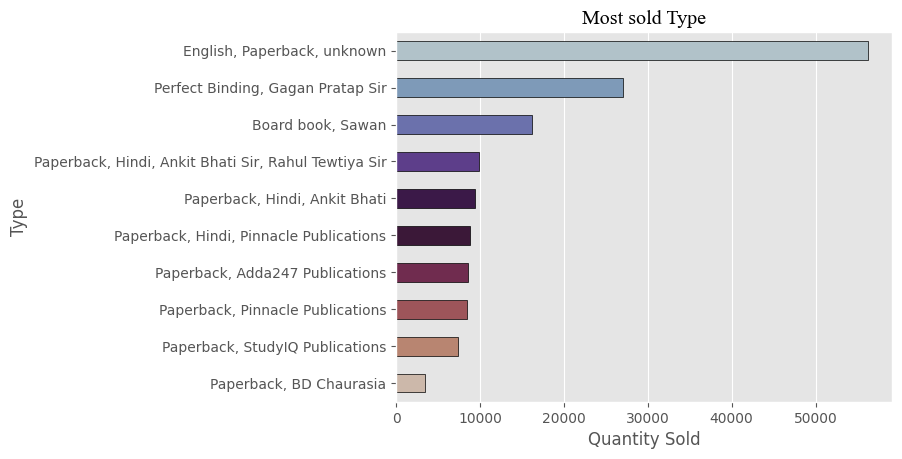

In [104]:
sns.barplot(x=qtm.values,y=qtm.index,edgecolor="k",width=0.5,palette="twilight")
plt.title("Most sold type",fontfamily="times new roman")
plt.ylabel("Type")
plt.xlabel("Quantity sold")
plt.show()

<br>

### 2.15 Relation between discount precent and rating

<br>

In [105]:
df.head(1)

,Item,type,selling_price,original_price,discount_perc,rating,Quantity_sold,Delivery_time,Sname,Cost,rating_status,Net_profit
0,"4 PCS Magic Practice Copybook For Kids, Englis...","Paperback, Generic",179,599,0.7,4.2,2450.0,Hot Deal,4 PCS Magic Practice Copybook,125.3,Low rating,53.7


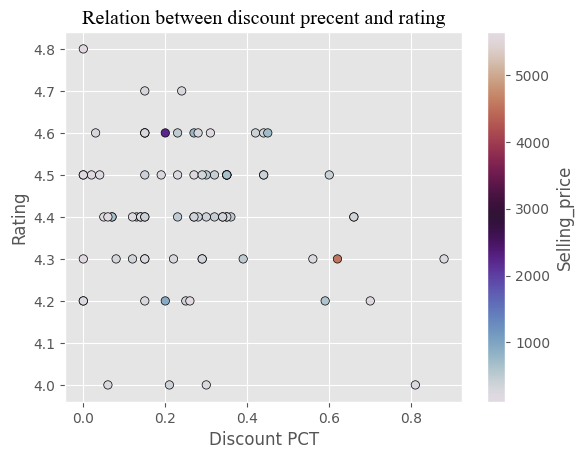

In [106]:
plt.scatter(df["discount_perc"],df["rating"],edgecolor="k",cmap="twilight",c=df["selling_price"])
plt.title("Relation between discount precent and rating",fontfamily="times new roman")
plt.ylabel("Rating")
plt.xlabel("Discount PCT")
colorbar=plt.colorbar()
colorbar.set_label('Selling_price')
plt.show()

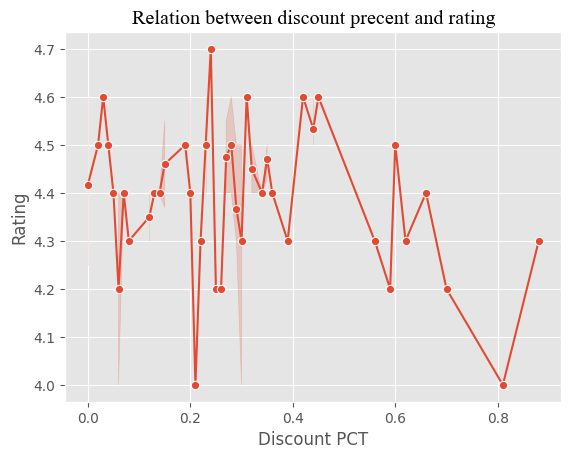

In [107]:
sns.lineplot(x=df["discount_perc"],y=df["rating"],marker='o')
plt.title("Relation between discount precent and rating",fontfamily="times new roman")
plt.ylabel("Rating")
plt.xlabel("Discount PCT")
plt.show()

<m>

### 2.15 Relation between selling price and quantity sold

<m>

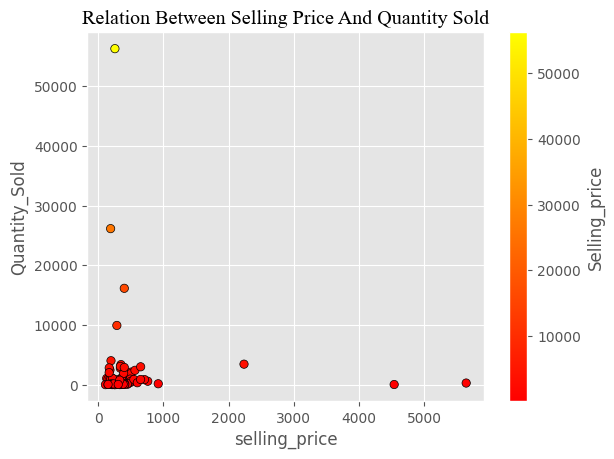

In [108]:
plt.scatter(df["selling_price"],df["Quantity_sold"],edgecolor="k",cmap="autumn",c=df["Quantity_sold"])
plt.title("Relation between selling price and quantity sold",fontfamily="times new roman")
plt.ylabel("Quantity sold")
plt.xlabel("selling price")
colorbar=plt.colorbar()
colorbar.set_label('Selling price')
plt.show()

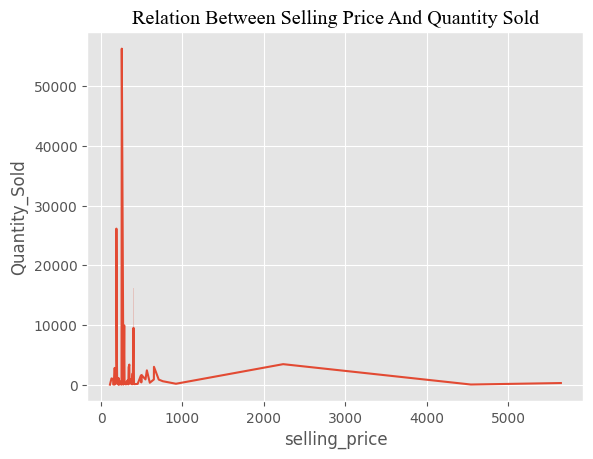

In [109]:
sns.lineplot(x=df["selling_price"],y=df["Quantity_sold"])
plt.title("Relation between selling price and quantity sold",fontfamily="times new roman")
plt.ylabel("Quantity sold")
plt.xlabel("selling price")
plt.show()

<m>

### 2.15 Relation between rating and quantity sold

<m>

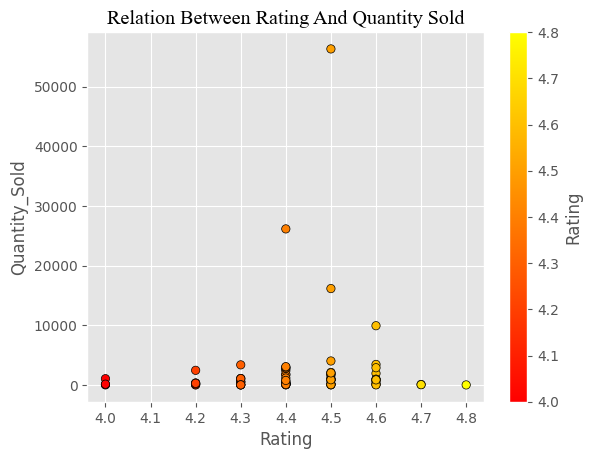

In [110]:
plt.scatter(df["rating"],df["Quantity_sold"],edgecolor="k",cmap="autumn",c=df["rating"])
plt.title("Relation between rating and quantity sold",fontfamily="times new roman")
plt.ylabel("Quantity sold")
plt.xlabel("Rating")
colorbar=plt.colorbar()
colorbar.set_label('Rating')
plt.show()

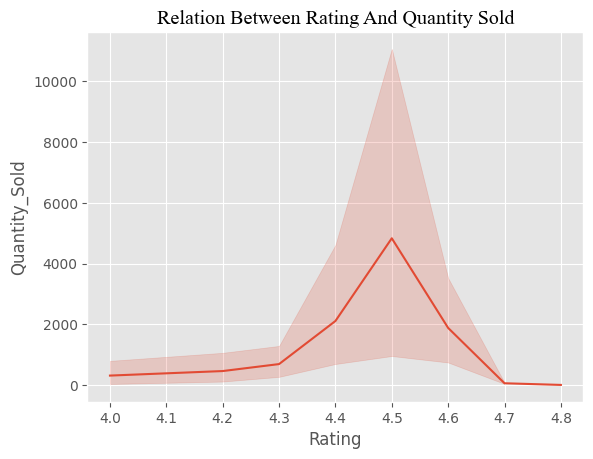

In [111]:
sns.lineplot(x=df["rating"],y=df["Quantity_sold"])
plt.title("Relation between rating and quantity sold",fontfamily="times new roman")
plt.ylabel("Quantity sold")
plt.xlabel("Rating")
plt.show()

<M>

### 2.15 Relation between rating and net profit

<m>

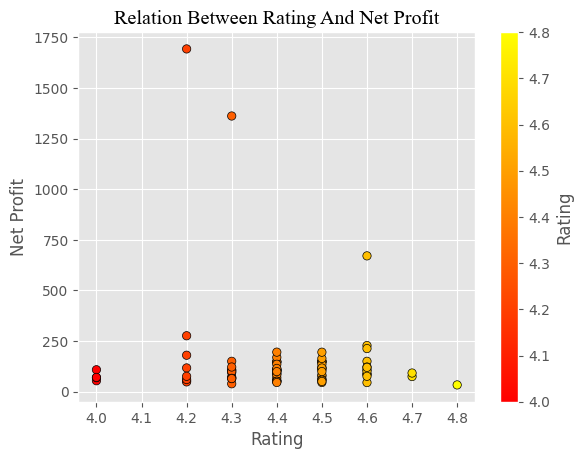

In [112]:
plt.scatter(df["rating"],df["Net_profit"],edgecolor="k",cmap="autumn",c=df["rating"])
plt.title("Relation between rating and net profit",fontfamily="times new roman")
plt.ylabel("Net profit")
plt.xlabel("Rating")
colorbar=plt.colorbar()
colorbar.set_label('Rating')
plt.show()

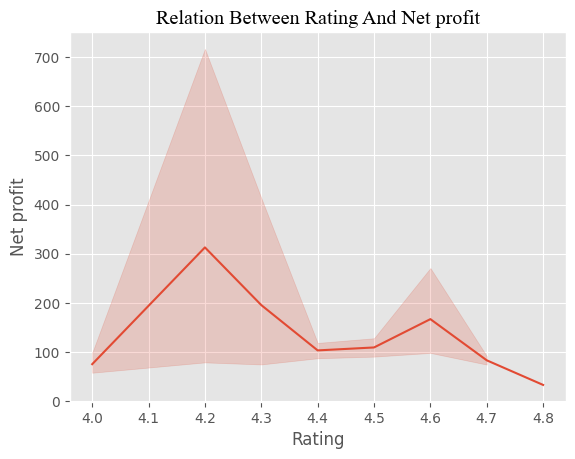

In [113]:
sns.lineplot(x=df["rating"],y=df["Net_profit"])
plt.title("Relation between rating and net profit",fontfamily="times new roman")
plt.ylabel("Net profit")
plt.xlabel("Rating")
plt.show()